# Pre-procesamiento de datos de EEG con MNE-Python (parte 2)
## Limpieza de datos 

En esta segunda parte se trabajará la limpieza de los datos a partir de la eliminación de los datos sucios.

## 0. Cargar paquetes

El paso cero es la carga de los paquetes. Es decir, la carga de las distintas funciones que vamos a estar utilizando en el script.

In [35]:
import os
import numpy as np
import mne
from mne.preprocessing import ICA, corrmap, create_ecg_epochs, create_eog_epochs

## 1. Carga de datos

Posteriormente, cargamos los datos en formato .fif que ya se encuentran **referenciados** y **filtrados**. 

In [36]:
subject_id = "SAAV0009"
task = "TOL"

raw = mne.io.read_raw_fif(("../data/" + task + "/preprocessing/" + subject_id + "_" + task +"_REF_FILT.fif"), preload=True)

Opening raw data file ../data/TOL/preprocessing/SAAV0009_TOL_REF_FILT.fif...


C:\Users\slipina\AppData\Local\Temp\ipykernel_12636\833002524.py:4: RuntimeWarning: This filename (../data/TOL/preprocessing/SAAV0009_TOL_REF_FILT.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(("../data/" + task + "/preprocessing/" + subject_id + "_" + task +"_REF_FILT.fif"), preload=True)


    Range : 0 ... 736255 =      0.000 ...   718.999 secs
Ready.
Reading 0 ... 736255  =      0.000 ...   718.999 secs...


# 2. Limpieza de los datos

En este paso, vamos a inspeccionar los datos para eliminar los intervalos de tiempo que se vean mal.

## 2.1. Inspección previa

Antes de proceder, vamos a generar un gráfico de espectro de frecuencias para ver como está el espectro antes de la limpieza.

Effective window size : 2.000 (s)


c:\Users\slipina\AppData\Local\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


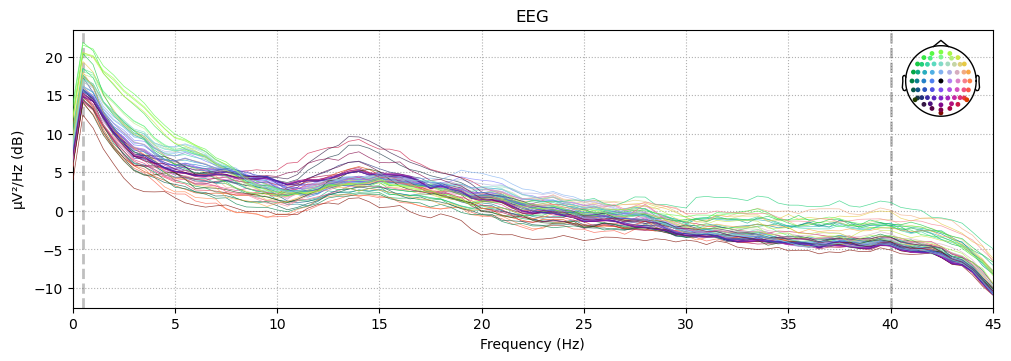

In [37]:
raw = raw.set_montage("biosemi64", on_missing="ignore")

raw.compute_psd(fmax=45).plot(picks="eeg")

## 2.2. Eliminando los intervalos malos

En este momento vamos a almacenar el gráfico con toda la señal dentro de un objeto llamado *fig*. A este objeto le vamos a aplicar la función `fake_keypress` para simular que apretamos la tecla a, que es lo que permite hacer anotaciones en gráficos. Una vez que estemos dentro del grafico buscaremos la opción de "add description" y le escribiremos "bad" para que MNE entienda que esos los debe eliminar.


In [12]:
fig = raw.plot()
fig.fake_keypress("a")  # Simulates user pressing 'a' on the keyboard.

Channels marked as bad:
none


Ahora guardaremos a los datos en un objeto que no contiene las partes marcadas como malas

In [33]:

info = raw.info

prueba = raw.get_data(reject_by_annotation='omit')
clean_raw = mne.io.RawArray(prueba, info)


Omitting 7515 of 736256 (1.02%) samples, retaining 728741 (98.98%) samples.


Creating RawArray with float64 data, n_channels=73, n_times=728741
    Range : 0 ... 728740 =      0.000 ...   711.660 secs
Ready.


## 2.1. Inspección posterior

Volvemos a graficar el espectro. Ahora para ver las diferencias con el anterior

Effective window size : 2.000 (s)


c:\Users\slipina\AppData\Local\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


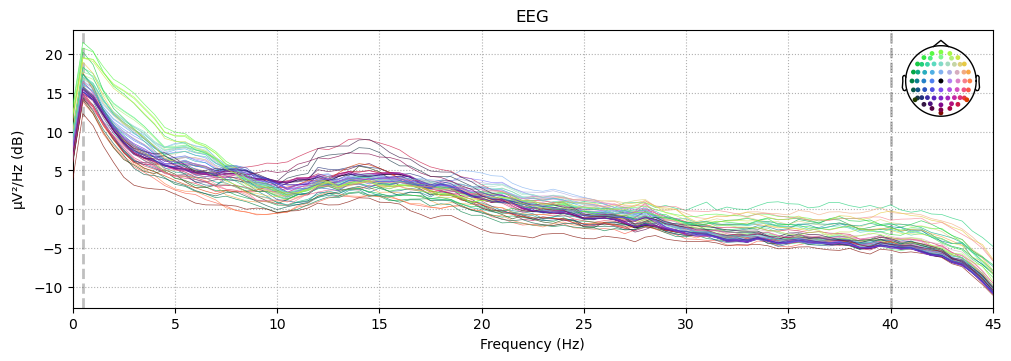

In [34]:
clean_raw.compute_psd(fmax=45).plot(picks="eeg")

# 4. Guardar datos limpios

In [39]:
clean_raw.save(("../data/" + task + "/preprocessing/" + subject_id + "_" + task +"_REF_FILT_CLEAN.fif"), overwrite=True)


Overwriting existing file.
Writing e:\Procesamiento EEG\scripts\..\data\TOL\preprocessing\SAAV0009_TOL_REF_FILT_CLEAN.fif


C:\Users\slipina\AppData\Local\Temp\ipykernel_12636\3082427480.py:1: RuntimeWarning: This filename (e:\Procesamiento EEG\scripts\..\data\TOL\preprocessing\SAAV0009_TOL_REF_FILT_CLEAN.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  clean_raw.save(("../data/" + task + "/preprocessing/" + subject_id + "_" + task +"_REF_FILT_CLEAN.fif"), overwrite=True)


Closing e:\Procesamiento EEG\scripts\..\data\TOL\preprocessing\SAAV0009_TOL_REF_FILT_CLEAN.fif
[done]
